Key findings within this norebook experiment:

Features used: 879 with one-hot-encoding => failed experiment

1. One-hot encoding (for categorical data) make the regression suffered. SIC can not be converted by one-hot encoding
2. Only 800 labels

In [172]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 20)

In [173]:
companies_table = pd.read_csv("feature-eng-data/companies_table.csv", low_memory=False)

In [151]:
companies_table.describe()

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst
count,2.823735e+06,80754.000000,2.830833e+06,5.640728e+06,5.640728e+06,5.640728e+06,4.895777e+06,4.895777e+06,4.895777e+06,4.895777e+06,5.640728e+06,5.640722e+06,5.640621e+06,5.868828e+06,5.640722e+06,5.661414e+06
mean,3.028971e-01,3.637980,3.622780e+00,2.498469e+02,2.841051e+02,1.553677e+01,1.209886e+00,8.841466e+01,3.960800e+01,7.726939e+00,5.826399e+00,5.826394e+00,5.826325e+00,4.999997e+00,5.826334e+00,3.421530e+01
std,1.187365e+02,28.828708,5.860372e+01,2.570283e+05,4.120520e+05,5.463643e+03,4.646990e+00,8.526514e-14,7.105428e-15,1.776357e-15,2.760908e+00,2.760906e+00,2.760883e+00,2.729695e-02,2.760872e+00,8.704552e+02
min,0.000000e+00,0.000000,0.000000e+00,2.304522e-07,0.000000e+00,0.000000e+00,3.750000e-02,8.841466e+01,3.960800e+01,7.726939e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e-04,0.003240,0.000000e+00,1.107918e+01,5.650000e+00,1.083441e+00,1.250000e-01,8.841466e+01,3.960800e+01,7.726939e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,5.214968e-02
50%,6.666000e-03,0.030566,1.000000e+00,4.431670e+01,2.260000e+01,4.333763e+00,3.750000e-01,8.841466e+01,3.960800e+01,7.726939e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00,7.902887e-01
75%,4.773000e-02,0.209834,2.000000e+00,7.755423e+01,3.955000e+01,7.584086e+00,8.750000e-01,8.841466e+01,3.960800e+01,7.726939e+00,9.000000e+00,9.000000e+00,9.000000e+00,5.000000e+00,9.000000e+00,3.498356e+00
max,1.752165e+05,4626.659921,4.400000e+04,6.093167e+08,9.395000e+08,1.297564e+07,9.975000e+01,8.841466e+01,3.960800e+01,7.726939e+00,1.000000e+01,1.000000e+01,9.000000e+00,1.000000e+01,1.000000e+01,4.567787e+05


In [19]:
companies_table.dtypes

CompanyNumber                    object
RegAddress_PostCode              object
CompanyCategory                  object
CompanyStatus                    object
CountryOfOrigin                  object
SIC                              object
AssetsM                         float64
TurnoverM                       float64
FTE                             float64
CalculationType                  object
IR_CO2ePerAssetsM               float64
IR_CO2ePerTurnoverM             float64
IR_CO2ePerFTE                   float64
DefraRatio                      float64
NormalisedIrCO2ePerAssetsM      float64
NormalisedIrCO2ePerTurnoverM    float64
NormalisedIrCO2ePerFTE          float64
ScoreC1a                        float64
ScoreC1t                        float64
ScoreC1f                        float64
ScoreC2                         float64
ScoreC1                         float64
S1S2TesCO2eEst                  float64
dtype: object

In [152]:
companies_table.shape

(5868837, 23)

companies_table["CountryOfOrigin"].nunique()

In [21]:
for col in companies_table.columns:
    print(col, companies_table[col].unique())
    print("\n")

CompanyNumber ['00000086' '00000118' '00000121' ... 'ZC000203' 'ZC000204' 'ZC000205']


RegAddress_PostCode ['TN25 6SX' 'TN23 1DA' 'EC4A 2EA' ... 'G73 4RL' 'AB25 2XE' 'EX35 6EQ']


CompanyCategory ['Private Limited Company' 'Public Limited Company' 'Private Unlimited'
 'PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)'
 "PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)"
 'PRIV LTD SECT. 30 (Private limited company, section 30 of the Companies Act)'
 'Old Public Company' 'Private Unlimited Company'
 'Community Interest Company' 'Other Company Type' 'Other company type'
 'Charitable Incorporated Organisation'
 'Scottish Charitable Incorporated Organisation'
 'Further Education and Sixth Form College Corps'
 'United Kingdom Economic Interest Grouping'
 'Investment Company with Variable Capital(Umbrella)'
 'Investment Company with Variable Capital (Securities)'
 'Investment Company with Variable Capital' 'Registered Society'
 'I

FTE [4.0000e+00        nan 0.0000e+00 2.0000e+00 5.0000e+00 3.0000e+00
 6.0000e+00 2.5000e+01 5.4000e+01 1.8000e+01 1.3000e+01 2.2000e+01
 1.4000e+01 1.0000e+00 3.7000e+01 3.0000e+01 1.2000e+01 2.1000e+01
 7.0000e+00 2.4000e+01 1.6000e+01 4.8000e+01 2.0000e+01 8.0000e+00
 9.0000e+00 1.3900e+02 4.0000e+01 3.6000e+01 2.9000e+01 1.2630e+03
 3.7500e+02 1.7000e+01 4.1000e+01 3.3000e+01 2.1900e+02 1.0900e+02
 6.1000e+01 3.5000e+01 1.0300e+02 1.0000e+01 5.1000e+01 2.3000e+01
 1.1000e+01 1.2300e+02 1.1600e+02 6.5000e+01 3.2400e+02 2.7000e+01
 4.7000e+01 2.5500e+02 1.0700e+02 9.9000e+01 1.9200e+02 6.0000e+01
 8.0000e+01 9.8000e+01 2.8000e+01 9.3000e+01 3.4000e+01 8.4000e+01
 5.8000e+01 9.4000e+01 5.3000e+01 1.9900e+02 9.1000e+01 3.8000e+01
 5.6000e+01 7.2000e+01 1.5200e+02 2.6000e+01 5.9000e+01 3.2000e+01
 1.2600e+02 5.7000e+01 4.9000e+01 1.5000e+01 1.2200e+02 1.9000e+01
 4.3000e+01 3.9000e+01 6.9000e+01 7.9000e+01 1.1400e+02 3.1000e+01
 3.2200e+02 8.9000e+01 1.5100e+02 4.6100e+02 4.5000e+01 1.

IR_CO2ePerFTE [1.08344086e+00 1.08344086e+01 3.25032258e+00 1.61432688e+02
 2.05853763e+01 3.25032258e-01 6.50064516e+00            nan
 1.40847312e+01 7.58408602e+00 1.19178495e+01 5.41720430e+00
 2.16688172e+00 2.70860215e+01 5.41720430e+01 7.58408602e+00
 1.67933333e+02 4.33376344e+02 8.66752688e+00 4.87548387e+01
 5.74223656e+01 8.77587097e+01 5.63389247e+01 1.73350538e+01
 1.51110406e-02 5.42803871e+02 3.35866667e+01 4.42748092e-01
 4.22541935e+01 3.60785806e+02 1.20261935e+02 4.65879570e+01
 2.27522581e+01 2.89149356e+00 6.70993151e+01 9.75096774e+00
 1.95019355e+01 1.47347957e+02 1.24726313e+03 4.33376344e+00
 3.36860420e+00 1.15928172e+02 7.69243011e+01 6.55481720e+02
 4.44350282e+00 0.00000000e+00 8.64585806e+02 3.02280000e+02
 3.79204301e+01 1.06177204e+02 4.44210753e+01 4.00950000e+00
 1.64189645e+01 2.38356989e+01 5.30886022e+01 8.31746032e+00
 5.68806452e+02 2.34023226e+02 1.86053450e+03 2.08722689e+00
 7.49575000e+00 9.90638670e+00 2.61936027e+01 5.93333333e+02
 6.4983333

S1S2TesCO2eEst [27.69793907  2.42877688  4.97705375 ... 38.77683772  0.57557115
  0.94513899]




In [27]:
companies_table_encoded = pd.get_dummies(companies_table, columns=["CompanyCategory", "CompanyStatus", "CountryOfOrigin", "SIC", "CalculationType"])

In [29]:
companies_table_encoded.shape

(5868837, 1095)

In [30]:
companies_table_encoded.head()

,CompanyNumber,RegAddress_PostCode,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst,CompanyCategory_Charitable Incorporated Organisation,CompanyCategory_Community Interest Company,CompanyCategory_Converted/Closed,CompanyCategory_Further Education and Sixth Form College Corps,CompanyCategory_Industrial and Provident Society,CompanyCategory_Investment Company with Variable Capital,CompanyCategory_Investment Company with Variable Capital (Securities),CompanyCategory_Investment Company with Variable Capital(Umbrella),CompanyCategory_Limited Liability Partnership,CompanyCategory_Limited Partnership,CompanyCategory_Old Public Company,CompanyCategory_Other Company Type,CompanyCategory_Other company type,CompanyCategory_Overseas Entity,"CompanyCategory_PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)","CompanyCategory_PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)","CompanyCategory_PRIV LTD SECT. 30 (Private limited company, section 30 of the Companies Act)",CompanyCategory_Private Limited Company,CompanyCategory_Private Unlimited,CompanyCategory_Private Unlimited Company,CompanyCategory_Protected Cell Company,CompanyCategory_Public Limited Company,CompanyCategory_Registered Society,CompanyCategory_Royal Charter Company,CompanyCategory_Scottish Charitable Incorporated Organisation,CompanyCategory_Scottish Partnership,CompanyCategory_United Kingdom Economic Interest Grouping,CompanyCategory_United Kingdom Societas,CompanyStatus_ADMINISTRATION ORDER,CompanyStatus_ADMINISTRATIVE RECEIVER,CompanyStatus_Active,CompanyStatus_Active - Proposal to Strike off,CompanyStatus_In Administration,CompanyStatus_In Administration/Administrative Receiver,CompanyStatus_In Administration/Receiver Manager,CompanyStatus_Liquidation,CompanyStatus_Live but Receiver Manager on at least one charge,CompanyStatus_RECEIVER MANAGER / ADMINISTRATIVE RECEIVER,CompanyStatus_RECEIVERSHIP,CompanyStatus_VOLUNTARY ARRANGEMENT / ADMINISTRATIVE RECEIVER,CompanyStatus_Voluntary Arrangement,CountryOfOrigin_,CountryOfOrigin_AFGHANISTAN,CountryOfOrigin_ALBANIA,CountryOfOrigin_ALDERNEY,CountryOfOrigin_ALGERIA,CountryOfOrigin_ANDORRA,CountryOfOrigin_ANGOLA,CountryOfOrigin_ANGUILLA,CountryOfOrigin_ANTIGUA AND BARBUDA,CountryOfOrigin_ARGENTINA,CountryOfOrigin_ARMENIA,CountryOfOrigin_AUSTRALIA,CountryOfOrigin_AUSTRIA,CountryOfOrigin_AZERBAIJAN,CountryOfOrigin_BAHAMAS,CountryOfOrigin_BAHRAIN,CountryOfOrigin_BANGLADESH,CountryOfOrigin_BARBADOS,CountryOfOrigin_BELARUS,CountryOfOrigin_BELARUS,CountryOfOrigin_BELGIUM,CountryOfOrigin_BELIZE,CountryOfOrigin_BERMUDA,CountryOfOrigin_BOSNIA AND HERZEGOVINA,CountryOfOrigin_BOSNIA HERZEGOVINA,CountryOfOrigin_BOTSWANA,CountryOfOrigin_BRAZIL,CountryOfOrigin_BRITISH INDIAN OCEAN TERRITORY,CountryOfOrigin_BRITISH VIRGIN ISLANDS,CountryOfOrigin_BRUNEI,CountryOfOrigin_BRUNEI DARUSSALAM,CountryOfOrigin_BULGARIA,CountryOfOrigin_BURUNDI,CountryOfOrigin_British Virgin Islands,CountryOfOrigin_CAMEROON,CountryOfOrigin_CANADA,CountryOfOrigin_CAYMAN ISLANDS,CountryOfOrigin_CHANNEL ISLANDS,CountryOfOrigin_CHILE,CountryOfOrigin_CHINA,CountryOfOrigin_COLOMBIA,CountryOfOrigin_COMOROS,CountryOfOrigin_CONGO,CountryOfOrigin_COOK ISLANDS,CountryOfOrigin_COSTA RICA,CountryOfOrigin_CROATIA,CountryOfOrigin_CURACAO,CountryOfOrigin_CURAÃ‡AO,CountryOfOrigin_CURAÇAO,CountryOfOrigin_CYPRUS,CountryOfOrigin_CZECH REPUBLIC,CountryOfOrigin_CZECHOSLOVAKIA,CountryOfOrigin_Cyprus,CountryOfOrigin_DENMARK,CountryOfOrigin_DOMINICA,CountryOfOrigin_ECUADOR,CountryOfOrigin_EGYPT,CountryOfOrigin_ENGLAND,CountryOfOrigin_ENGLAND & WALES,CountryOfOrigin_ENGLAND AND WALES,CountryOfOrigin_ESTONIA,CountryOfOrigin_ETHIOPIA,CountryOfOrigin_FALKLAND ISLANDS,CountryOfOrigin_FAROE IS,CountryOfOrigin_FAROE ISLANDS,CountryOfOrigin_FIJI,CountryOfOrigin_FINLAND,Country

In [174]:
scores_table = pd.read_excel("feature-eng-data/ScoresABC1C2DE.xlsx")
scores_table = scores_table.drop(columns=["NatSic", "NatSicDesc", "AuditID", "ScoreD", "ScoreE"])

In [65]:
scores_table.head(3)

,Company_Number,Company_Name,S1CO2e,S2CO2e,S1S2CO2e,S3CO2e,S1S2S3CO2e,IR_Calc_CO2ePerAssetsM,RawAssScore,IR_Calc_CO2ePerTurnoverM,RawTurScore,IR_Calc_CO2ePerFTE,RawFteScore,C1Score,DefraRatio,IR_Defra_CO2ePerAssetsM,DefraAssScore,IR_Defra_CO2ePerTurnoverM,DefraTurScore,IR_Defra_CO2ePerFTE,DefraFteScore,C2Score,TurnoverM,NetAssetsM,FTE,SIC
0,11535957,GRESHAM HOUSE ENERGY STORAGE FUND PLC,1660.0,2891.0,4551.0,NaN,4551.0,8.895622,8,52.918605,4.0,0.000000,NaN,6.0,0.0375,237.216575,3.0,1411.162791,1.0,0.000000,NaN,2.0,85.83,511.6,0.0,64301
1,08860816,GULF MARINE SERVICES PLC,45412.0,479.0,45891.0,NaN,45891.0,199.006938,3,539.894118,1.0,86.261278,2.0,2.0,1.3750,144.732319,4.0,392.650267,2.0,62.735475,2.0,2.0,84.78,230.6,532.0,329
2,04457314,HALFORDS GROUP PLC,13095.0,10126.0,23221.0,NaN,23221.0,55.579225,5,17.972910,6.0,2.057505,6.0,5.0,0.7500,74.105633,5.0,23.963880,6.0,2.743340,7.0,6.0,1292.30,417.8,11286.0,454


In [175]:
scores_table_in_company = companies_table[companies_table["CompanyNumber"].isin(scores_table["Company_Number"])]

In [176]:
scores_table_in_company

,CompanyNumber,RegAddress_PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,SIC,AssetsM,TurnoverM,FTE,CalculationType,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst
270,00019457,M22 5TG,Public Limited Company,Active,United Kingdom,329,NaN,NaN,NaN,Actuals,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10.0,10.0,9.0,9.0,9.0,4.752723
381,00024869,GL3 4AW,Public Limited Company,Active,United Kingdom,6512,NaN,NaN,NaN,Actuals,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10.0,9.0,8.0,6.0,9.0,1.300129
478,00029559,TN15 7AE,Public Limited Company,Active,United Kingdom,701,NaN,NaN,NaN,Actuals,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2.0,1.0,5.0,2.0,2.0,4.977054
492,00030226,LA9 6PZ,Public Limited Company,Active,United Kingdom,1712,NaN,NaN,NaN,Actuals,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2.0,2.0,2.0,5.0,2.0,574.223656
567,00033774,EC4A 4AB,Public Limited Company,Active,United Kingdom,2059,NaN,NaN,NaN,Actuals,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1.0,2.0,1.0,2.0,1.0,2426.440525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607978,SC367563,G2 5TS,Public Limited Company,Active,United Kingdom,8299,NaN,NaN,NaN,Actuals,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8.0,5.0,5.0,6.0,6.0,1.148973
5623078,SC419949,PH18 5TW,Private Limited Company,Active,United Kingdom,64921,39.798566,NaN,0.0,Actuals,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7.0,5.0,NaN,2.0,6.0,132.280591
5629340,SC440783,AB12 4QB,Private Limited Company,Active,United Kingdom,1011,3.267717,526.683574,1293.0,Actuals,9889.035686,25.656627,9.606767,2.6250,88.414665,39.608,7.726939,1.0,5.0,3.0,5.0,3.0,760.275821
5681916,SC578050,AB10 1HA,Private Limited Company,Active,United Kingdom,46431,NaN,116.001369,0.0,Actuals,16.295030,1.242424,0.000000,1.2500,88.414665,39.608,7.726939,7.0,9.0,NaN,9.0,8.0,6554.077348


In [83]:
missing_values = scores_table_in_company.isna().sum()
print(missing_values)

CompanyNumber                                                                                                  0
RegAddress_PostCode                                                                                            1
AssetsM                                                                                                        0
TurnoverM                                                                                                      0
FTE                                                                                                           77
IR_CO2ePerAssetsM                                                                                              0
IR_CO2ePerTurnoverM                                                                                            0
IR_CO2ePerFTE                                                                                                  0
DefraRatio                                                                                      

In [84]:
missing_values = scores_table.isna().sum()
print(missing_values)

Company_Number     0
Company_Name       0
S1CO2e            48
S2CO2e            35
S1S2CO2e           0
                  ..
C2Score           13
TurnoverM          0
NetAssetsM         0
FTE               77
SIC                2
Length: 26, dtype: int64


In [178]:
scores_table_in_company[["AssetsM", "TurnoverM", "FTE"]].describe()

,AssetsM,TurnoverM,FTE
count,237.000000,216.000000,326.000000
mean,20.501685,80.876127,457.122699
std,47.523284,91.399817,1640.750552
min,0.000064,0.038550,0.000000
25%,3.182848,36.553888,7.000000
50%,10.857380,56.203935,173.000000
75%,22.304625,86.404547,407.250000
max,507.330000,595.633096,25407.000000


In [163]:
scores_table_in_company["FTE"].head(100)

270        3152.0
381        1048.0
478       76060.0
492         584.0
567        4017.0
727         401.0
758        7759.0
772           NaN
881         354.0
939           NaN
1037       6000.0
1065      20744.0
1396        441.0
1709       4522.0
1734      35700.0
1884       4000.0
2016       2286.0
2035       4100.0
2148       1188.0
2344       5202.0
2460       1108.0
2462      60000.0
2487      18000.0
2544        402.0
2697       8323.0
2896       1294.0
3029        847.0
3030        476.0
3354      14600.0
3464        819.0
4096       6384.0
4152        469.0
4406        425.0
4730        581.0
4819       1166.0
5070     117000.0
5455       1050.0
5646          6.0
5763       3162.0
5832       6135.0
6048        146.0
6075        121.0
6180        252.0
6450       2915.0
6650         27.0
6944         66.0
7078         72.0
7215       4724.0
7538       1817.0
8744       4000.0
8921          NaN
9164     128000.0
9229        191.0
9314       5358.0
9699       1129.0
9736      

In [68]:
scores_table.head(3)

,Company_Number,Company_Name,S1CO2e,S2CO2e,S1S2CO2e,S3CO2e,S1S2S3CO2e,IR_Calc_CO2ePerAssetsM,RawAssScore,IR_Calc_CO2ePerTurnoverM,RawTurScore,IR_Calc_CO2ePerFTE,RawFteScore,C1Score,DefraRatio,IR_Defra_CO2ePerAssetsM,DefraAssScore,IR_Defra_CO2ePerTurnoverM,DefraTurScore,IR_Defra_CO2ePerFTE,DefraFteScore,C2Score,TurnoverM,NetAssetsM,FTE,SIC
0,11535957,GRESHAM HOUSE ENERGY STORAGE FUND PLC,1660.0,2891.0,4551.0,NaN,4551.0,8.895622,8,52.918605,4.0,0.000000,NaN,6.0,0.0375,237.216575,3.0,1411.162791,1.0,0.000000,NaN,2.0,85.83,511.6,0.0,64301
1,08860816,GULF MARINE SERVICES PLC,45412.0,479.0,45891.0,NaN,45891.0,199.006938,3,539.894118,1.0,86.261278,2.0,2.0,1.3750,144.732319,4.0,392.650267,2.0,62.735475,2.0,2.0,84.78,230.6,532.0,329
2,04457314,HALFORDS GROUP PLC,13095.0,10126.0,23221.0,NaN,23221.0,55.579225,5,17.972910,6.0,2.057505,6.0,5.0,0.7500,74.105633,5.0,23.963880,6.0,2.743340,7.0,6.0,1292.30,417.8,11286.0,454


In [179]:
replacement_dict = {k: v for k, v in zip(scores_table['Company_Number'], scores_table['NetAssetsM'])}

In [67]:
replacement_dict

{'11535957': 511.6,
 '08860816': 230.6,
 '04457314': 417.8,
 '10638461': 639.0,
 '00227691': 223.7,
 '11325534': 21.6,
 '09402231': 2658.2,
 '07440171': 55.3,
 '01604952': 16.0,
 '03870101': 35.4,
 '00623364': 179.0,
 '00040932': 1403.1,
 '00360632': 2746.0,
 '09579188': 87.6,
 '02442580': 442.7,
 '09038082': 18.9,
 '08548351': 397.41,
 '02708030': 435.0,
 '05661581': 20.265134,
 '01856955': 14.599883,
 '08279139': 149.3,
 '03607311': 112.0,
 '10004236': 14.8,
 '03959572': 24.45,
 '05019106': 60.45,
 '11961132': 259.5,
 '00824821': 4136.4,
 '01568937': 133.9,
 '01954085': 2858.536,
 '09777975': 328.0,
 '11361159': 21.240909,
 '09934451': 805.6,
 '06729790': 9.478908,
 '06628091': 3.545069,
 '02285049': 6.0,
 '04128850': 44.82,
 '01919797': 139.45,
 '10814022': 439.3,
 '08215888': 3350.0,
 '10916935': 174.917,
 '03233037': 8.505,
 '01806047': 1.45,
 '00745839': 25.538755,
 '06674049': 899.4,
 'SC286832': 9247.0,
 'NI018800': 10875.0,
 '07262416': 295.194,
 '13141124': 539.323,
 '1335759

In [180]:
scores_table_in_company['AssetsM'] = scores_table_in_company['CompanyNumber'].map(replacement_dict)

/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_9052/3498560973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_table_in_company['AssetsM'] = scores_table_in_company['CompanyNumber'].map(replacement_dict)


In [74]:
missing_values = scores_table_in_company.isna().sum()
print(missing_values)

CompanyNumber                          0
RegAddress_PostCode                    1
AssetsM                                0
TurnoverM                            663
FTE                                  553
                                    ... 
CalculationType_EstSizeCalc            0
CalculationType_FullCalc               0
CalculationType_No accounts filed      0
CalculationType_Not Active             0
CalculationType_Wiped                  0
Length: 1095, dtype: int64


In [181]:
replacement_dict = {k: v for k, v in zip(scores_table['Company_Number'], scores_table['TurnoverM'])}

In [182]:
scores_table_in_company['TurnoverM'] = scores_table_in_company['CompanyNumber'].map(replacement_dict)

/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_9052/3507790437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_table_in_company['TurnoverM'] = scores_table_in_company['CompanyNumber'].map(replacement_dict)


In [77]:
missing_values = scores_table_in_company.isna().sum()
print(missing_values)

CompanyNumber                          0
RegAddress_PostCode                    1
AssetsM                                0
TurnoverM                              0
FTE                                  553
                                    ... 
CalculationType_EstSizeCalc            0
CalculationType_FullCalc               0
CalculationType_No accounts filed      0
CalculationType_Not Active             0
CalculationType_Wiped                  0
Length: 1095, dtype: int64


In [183]:
replacement_dict = {k: v for k, v in zip(scores_table['Company_Number'], scores_table['FTE'])}

In [184]:
scores_table_in_company['FTE'] = scores_table_in_company['CompanyNumber'].map(replacement_dict)

/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_9052/3491119613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_table_in_company['FTE'] = scores_table_in_company['CompanyNumber'].map(replacement_dict)


In [186]:
missing_values = scores_table_in_company.isna().sum()
print(missing_values.head(20))

CompanyNumber                     0
RegAddress_PostCode               1
CompanyCategory                   0
CompanyStatus                     0
CountryOfOrigin                   0
SIC                               2
AssetsM                           0
TurnoverM                         0
FTE                              77
CalculationType                   0
IR_CO2ePerAssetsM                 0
IR_CO2ePerTurnoverM               0
IR_CO2ePerFTE                     0
DefraRatio                       17
NormalisedIrCO2ePerAssetsM       17
NormalisedIrCO2ePerTurnoverM     17
NormalisedIrCO2ePerFTE           17
ScoreC1a                          0
ScoreC1t                          6
ScoreC1f                        107
dtype: int64


In [187]:
# Scores table real values in ScoresABC1C2DE
scores_table_in_company[["AssetsM", "TurnoverM", "FTE"]].describe()

,AssetsM,TurnoverM,FTE
count,8.790000e+02,8.790000e+02,8.020000e+02
mean,1.842095e+09,2.829146e+07,9.406536e+03
std,5.165306e+10,8.387231e+08,6.554493e+04
min,2.491000e-03,4.331700e-02,0.000000e+00
25%,1.615502e+01,4.852950e+01,1.460000e+02
50%,7.170000e+01,1.085000e+02,4.995000e+02
75%,4.699500e+02,5.465323e+02,2.155750e+03
max,1.528842e+12,2.486641e+10,1.645000e+06


In [87]:
S1S2CO2e_dict = {k: v for k, v in zip(scores_table['Company_Number'], scores_table['S1S2CO2e'])}

In [157]:
pd.set_option('display.max_rows', 50)
scores_table_in_company.isna().sum().head(15)

CompanyNumber                     0
RegAddress_PostCode               1
AssetsM                           0
TurnoverM                         0
FTE                              77
IR_CO2ePerAssetsM                 0
IR_CO2ePerTurnoverM               0
IR_CO2ePerFTE                     0
DefraRatio                       17
NormalisedIrCO2ePerAssetsM       17
NormalisedIrCO2ePerTurnoverM     17
NormalisedIrCO2ePerFTE           17
ScoreC1a                          0
ScoreC1t                          6
ScoreC1f                        107
dtype: int64

In [ ]:
scores_table_in_company

In [88]:
scores_table_in_company['S1S2CO2e'] = scores_table_in_company['CompanyNumber'].map(S1S2CO2e_dict)

/var/folders/p6/yvn5sdc10690vb5dljmbnblm0000gn/T/ipykernel_9052/3856667283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_table_in_company['S1S2CO2e'] = scores_table_in_company['CompanyNumber'].map(S1S2CO2e_dict)


In [89]:
scores_table_in_company

CompanyNumber RegAddress_PostCode      AssetsM     TurnoverM      FTE  \
270          00019457             M22 5TG   788.000000    603.300000   3152.0   
381          00024869             GL3 4AW  1827.000000    486.000000   1048.0   
478          00029559            TN15 7AE   426.000000    291.200000  76060.0   
492          00030226             LA9 6PZ    82.800000    104.600000    584.0   
567          00033774            EC4A 4AB  2685.000000  15700.000000   4017.0   
...               ...                 ...          ...           ...      ...   
5607978      SC367563              G2 5TS   553.800000    108.500000   1125.0   
5623078      SC419949            PH18 5TW    39.798566     29.375452      0.0   
5629340      SC440783            AB12 4QB     1.292037    498.237572   1330.0   
5681916      SC578050            AB10 1HA     7.548314     99.051884      0.0   
5690539      SC595124            AB15 4YL  5430.391453   1001.113491      NaN   

         IR_CO2ePerAssetsM  IR_CO2ePerTurnoverM  IR_CO2ePerFTE  DefraRatio  \
270               0.060444             0.078988       0.015111      1.3750   
381               0.253968             0.954733       0.442748      0.0375   
478             516.260563           755.762887       2.891494      0.3750   
492             473.260870           373.200000      67.099315      6.6250   
567            1866.017132           319.124586    1247.263132      3.8750   
...                    ...                  ...            ...         ...   
5607978           5.116468            25.995413       2.518667      0.3750   
5623078          20.503251            28.137931       0.000000      0.0375   
5629340        9889.035686            25.656627       9.606767      2.6250   
5681916          16.295030             1.242424       0.000000      1.2500   
5690539          89.003713           482.842158       0.000000      0.1250   

         NormalisedIrCO2ePerAssetsM  NormalisedIrCO2ePerTurnoverM  \
270                       88.414665                        39.608   
381                       88.414665                        39.608   
478                       88.414665                        39.608   
492                       88.414665                        39.608   
567                       88.414665                        39.608   
...                             ...                           ...   
5607978                   88.414665                        39.608   
5623078                   88.414665                        39.608   
5629340                   88.414665                        39.608   
5681916                   88.414665                        39.608   
5690539                   88.414665                        39.608   

         NormalisedIrCO2ePerFTE  ScoreC1a  ScoreC1t  ScoreC1f  ScoreC2  \
270                    7.726939      10.0      10.0       9.0      9.0   
381                    7.726939      10.0       9.0       8.0      6.0   
478                    7.726939       2.0       1.0       5.0      2.0   
492                    7.726939       2.0       2.0       2.0      5.0   
567                    7.726939       1.0       2.0       1.0      2.0   
...                         ...       ...       ...       ...      ...   
5607978                7.726939       8.0       5.0       5.0      6.0   
5623078                7.726939       7.0       5.0       NaN      2.0   
5629340                7.726939       1.0       5.0       3.0      5.0   
5681916                7.726939       7.0       9.0       NaN      9.0   
5690539                7.726939       4.0       1.0       NaN      7.0   

         ScoreC1  S1S2TesCO2eEst  \
270          9.0        4.752723   
381          9.0        1.300129   
478          2.0        4.977054   
492          2.0      574.223656   
567          1.0     2426.440525   
...          ...             ...   
5607978      6.0        1.148973   
5623078      6.0      132.280591   
5629340      3.0      760.275821   
5681916      8.0    

In [90]:
scores_table_in_company.to_csv('feature-eng-data/scores_table_in_company.csv', index=False)

In [95]:
scores_table_in_company.dtypes

CompanyNumber                         object
RegAddress_PostCode                   object
AssetsM                              float64
TurnoverM                            float64
FTE                                  float64
                                      ...   
CalculationType_FullCalc               uint8
CalculationType_No accounts filed      uint8
CalculationType_Not Active             uint8
CalculationType_Wiped                  uint8
S1S2CO2e                             float64
Length: 1096, dtype: object

In [96]:
scores_table_in_company_matrix = scores_table_in_company.drop(columns=["RegAddress_PostCode"])

# set 'CompanyNumber' as the index
scores_table_in_company_matrix.set_index('CompanyNumber', inplace=True)

In [105]:
missing_values = scores_table_in_company_matrix.isna().sum()
print(missing_values)

AssetsM                                                                                                        0
TurnoverM                                                                                                      0
FTE                                                                                                           77
IR_CO2ePerAssetsM                                                                                              0
IR_CO2ePerTurnoverM                                                                                            0
IR_CO2ePerFTE                                                                                                  0
DefraRatio                                                                                                    17
NormalisedIrCO2ePerAssetsM                                                                                    17
NormalisedIrCO2ePerTurnoverM                                                                    

In [106]:
# fill missing values with the mean of each column
scores_table_in_company_matrix.fillna(scores_table_in_company_matrix.mean(), inplace=True)

In [107]:
missing_values = scores_table_in_company_matrix.isna().sum()
print(missing_values)

AssetsM                                                                                                      0
TurnoverM                                                                                                    0
FTE                                                                                                          0
IR_CO2ePerAssetsM                                                                                            0
IR_CO2ePerTurnoverM                                                                                          0
IR_CO2ePerFTE                                                                                                0
DefraRatio                                                                                                   0
NormalisedIrCO2ePerAssetsM                                                                                   0
NormalisedIrCO2ePerTurnoverM                                                                                 0
N

In [108]:
import numpy as np
from sklearn.model_selection import train_test_split

X = scores_table_in_company_matrix.values[:, :-1]
y = scores_table_in_company_matrix.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

Number of instances in X: 879
Number of instances in X_train: 615
Number of instances in X_test: 264
Number of instances in X_train and X_test together: 879


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regressor = LinearRegression(fit_intercept=True, copy_X=True)
linear_regressor.fit(X_train, y_train)
print('Training accuracy: {:.3f}'.format(linear_regressor.score(X_train, y_train)))

print('Testing accuracy by using score function: {:.3f}'.format(linear_regressor.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, linear_regressor.predict(X_test))))

Training accuracy: 1.000
Testing accuracy by using score function: -4533008840.116
Testing accuracy by using r2_score meric: -4533008840.116


In [111]:
companies_table.shape

(5868837, 23)

In [112]:
scores_table_in_company.shape

(879, 1096)

In [113]:
companies_table.describe()

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2TesCO2eEst
count,2.823735e+06,80754.000000,2.830833e+06,5.640728e+06,5.640728e+06,5.640728e+06,4.895777e+06,4.895777e+06,4.895777e+06,4.895777e+06,5.640728e+06,5.640722e+06,5.640621e+06,5.868828e+06,5.640722e+06,5.661414e+06
mean,3.028971e-01,3.637980,3.622780e+00,2.498469e+02,2.841051e+02,1.553677e+01,1.209886e+00,8.841466e+01,3.960800e+01,7.726939e+00,5.826399e+00,5.826394e+00,5.826325e+00,4.999997e+00,5.826334e+00,3.421530e+01
std,1.187365e+02,28.828708,5.860372e+01,2.570283e+05,4.120520e+05,5.463643e+03,4.646990e+00,8.526514e-14,7.105428e-15,1.776357e-15,2.760908e+00,2.760906e+00,2.760883e+00,2.729695e-02,2.760872e+00,8.704552e+02
min,0.000000e+00,0.000000,0.000000e+00,2.304522e-07,0.000000e+00,0.000000e+00,3.750000e-02,8.841466e+01,3.960800e+01,7.726939e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e-04,0.003240,0.000000e+00,1.107918e+01,5.650000e+00,1.083441e+00,1.250000e-01,8.841466e+01,3.960800e+01,7.726939e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,5.214968e-02
50%,6.666000e-03,0.030566,1.000000e+00,4.431670e+01,2.260000e+01,4.333763e+00,3.750000e-01,8.841466e+01,3.960800e+01,7.726939e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,6.000000e+00,7.902887e-01
75%,4.773000e-02,0.209834,2.000000e+00,7.755423e+01,3.955000e+01,7.584086e+00,8.750000e-01,8.841466e+01,3.960800e+01,7.726939e+00,9.000000e+00,9.000000e+00,9.000000e+00,5.000000e+00,9.000000e+00,3.498356e+00
max,1.752165e+05,4626.659921,4.400000e+04,6.093167e+08,9.395000e+08,1.297564e+07,9.975000e+01,8.841466e+01,3.960800e+01,7.726939e+00,1.000000e+01,1.000000e+01,9.000000e+00,1.000000e+01,1.000000e+01,4.567787e+05


In [117]:
scores_table.describe()

,S1CO2e,S2CO2e,S1S2CO2e,S3CO2e,S1S2S3CO2e,IR_Calc_CO2ePerAssetsM,RawAssScore,IR_Calc_CO2ePerTurnoverM,RawTurScore,IR_Calc_CO2ePerFTE,RawFteScore,C1Score,DefraRatio,IR_Defra_CO2ePerAssetsM,DefraAssScore,IR_Defra_CO2ePerTurnoverM,DefraTurScore,IR_Defra_CO2ePerFTE,DefraFteScore,C2Score,TurnoverM,NetAssetsM,FTE
count,8.340000e+02,8.470000e+02,8.820000e+02,6.750000e+02,8.820000e+02,8.820000e+02,882.000000,8.820000e+02,876.000000,8.820000e+02,761.000000,876.000000,875.000000,8.750000e+02,875.000000,8.750000e+02,869.000000,8.750000e+02,756.000000,869.000000,8.820000e+02,8.820000e+02,8.050000e+02
mean,2.090309e+08,9.439676e+07,2.883059e+08,3.226954e+08,5.352678e+08,7.338265e+05,5.509070,1.376360e+06,5.478311,1.491984e+04,4.837057,5.009132,3.307986,1.149012e+06,5.514286,8.373626e+06,5.484465,3.962161e+05,4.849206,5.004603,2.819525e+07,1.835829e+09,9.576337e+03
std,5.964985e+09,2.743193e+09,8.488532e+09,8.276567e+09,1.572887e+10,2.055336e+07,2.877055,3.294219e+07,2.862684,4.369082e+05,2.503628,2.488815,11.383696,3.346963e+07,2.873888,2.469856e+08,2.858619,1.169749e+07,2.504779,2.450896,8.372955e+08,5.156516e+10,6.564558e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.060000e+00,2.304522e-07,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,0.037500,8.228905e-03,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,4.331700e-02,2.491000e-03,0.000000e+00
25%,8.925000e+01,1.080000e+02,2.541932e+02,0.000000e+00,4.032717e+02,8.921151e+00,3.000000,4.580988e+00,3.000000,4.829710e-01,3.000000,3.000000,0.125000,1.808456e+01,3.000000,9.312567e+00,3.000000,9.633410e-01,3.000000,3.000000,4.856427e+01,1.624317e+01,1.460000e+02
50%,7.730000e+02,4.970000e+02,1.486800e+03,2.600000e+01,2.077500e+03,4.209265e+01,6.000000,2.032736e+01,5.000000,2.510897e+00,5.000000,5.000000,0.625000,6.980832e+01,6.000000,3.742632e+01,5.000000,4.536646e+00,5.000000,5.000000,1.087500e+02,7.170000e+01,5.060000e+02
75%,6.947750e+03,4.286500e+03,1.278550e+04,1.815500e+03,2.685175e+04,2.120754e+02,8.000000,9.003488e+01,8.000000,1.369689e+01,7.000000,7.000000,1.250000,3.429286e+02,8.000000,1.542967e+02,8.000000,2.381098e+01,7.000000,7.000000,5.477662e+02,4.775000e+02,2.160000e+03
max,1.722560e+11,7.983600e+10,2.520920e+11,2.150310e+11,4.671230e+11,6.093167e+08,10.000000,9.395000e+08,10.000000,1.297564e+07,9.000000,10.000000,99.750000,9.899817e+08,10.000000,7.305932e+09,10.000000,3.460170e+08,9.000000,10.000000,2.486641e+10,1.528842e+12,1.645000e+06


In [136]:
# Outlier for S1S2CO2e
scores_500000co = scores_table[scores_table["S1S2CO2e"]<500000]

# Outlier for NetAssetsM
scores_500000co_ass = scores_500000co[scores_500000co["NetAssetsM"]<175216.5]

# Outlier for FTE
scores_500000co_ass_fte = scores_500000co_ass[scores_500000co["FTE"]<175216.5]

In [148]:
scores_500000co_ass

,Company_Number,Company_Name,S1CO2e,S2CO2e,S1S2CO2e,S3CO2e,S1S2S3CO2e,IR_Calc_CO2ePerAssetsM,RawAssScore,IR_Calc_CO2ePerTurnoverM,RawTurScore,IR_Calc_CO2ePerFTE,RawFteScore,C1Score,DefraRatio,IR_Defra_CO2ePerAssetsM,DefraAssScore,IR_Defra_CO2ePerTurnoverM,DefraTurScore,IR_Defra_CO2ePerFTE,DefraFteScore,C2Score,TurnoverM,NetAssetsM,FTE,SIC
0,11535957,GRESHAM HOUSE ENERGY STORAGE FUND PLC,1660.00,2891.000000,4551.00,NaN,4551.00,8.895622,8,52.918605,4.0,0.000000,NaN,6.0,0.0375,237.216575,3.0,1411.162791,1.0,0.000000,NaN,2.0,85.830000,511.600000,0.0,64301
1,08860816,GULF MARINE SERVICES PLC,45412.00,479.000000,45891.00,NaN,45891.00,199.006938,3,539.894118,1.0,86.261278,2.0,2.0,1.3750,144.732319,4.0,392.650267,2.0,62.735475,2.0,2.0,84.780000,230.600000,532.0,329
2,04457314,HALFORDS GROUP PLC,13095.00,10126.000000,23221.00,NaN,23221.00,55.579225,5,17.972910,6.0,2.057505,6.0,5.0,0.7500,74.105633,5.0,23.963880,6.0,2.743340,7.0,6.0,1292.300000,417.800000,11286.0,454
3,10638461,THE PRS REIT PLC,1212.00,257.000000,1469.00,395.0,1864.00,2.917058,9,44.380952,4.0,0.000000,NaN,6.0,0.0375,77.788211,5.0,1183.492063,1.0,0.000000,NaN,3.0,42.000000,639.000000,NaN,64301
4,00227691,THE VITEC GROUP PLC.,1467.00,2773.000000,4240.00,173148.0,177388.00,792.972731,2,393.321508,2.0,6569.925926,1.0,1.0,0.3750,2114.593950,1.0,1048.857354,2.0,17519.802469,1.0,1.0,451.200000,223.700000,27.0,701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,05069228,M and M Direct Limited,735.80,1256.800000,1992.60,0.0,1992.60,21.366761,7,6.490554,7.0,2.122045,6.0,6.0,0.8750,24.419155,8.0,7.417776,8.0,2.425194,7.0,7.0,306.616000,93.257000,939.0,4791
878,06839872,CLICK ENTERTAINMENT LIMITED,16.18,7.560000,23.74,0.0,23.74,2.342494,9,0.194590,10.0,0.494583,8.0,9.0,1.2500,1.873995,10.0,0.155672,10.0,0.395667,9.0,9.0,122.366695,10.134499,48.0,4652
879,05210733,CENKOS SECURITIES PLC,NaN,36.000000,36.00,NaN,36.00,1.333333,10,1.333333,9.0,0.404494,8.0,9.0,0.1250,10.666667,9.0,10.666667,8.0,3.235955,6.0,7.0,27.200000,27.000000,89.0,6612
880,10887298,NATIONAL TIMBER GROUP TOPCO LIMITED,3455.00,1483.000000,4938.00,NaN,4938.00,4137.761134,1,23.740385,5.0,3.542324,5.0,3.0,0.0375,110340.296917,1.0,633.076923,2.0,94.461980,2.0,1.0,207.682483,1.193399,1394.0,64202


In [131]:
scores_table.shape

(882, 26)

In [137]:
scores_500000co.shape

(841, 26)

In [138]:
scores_500000co_ass.shape

(836, 26)

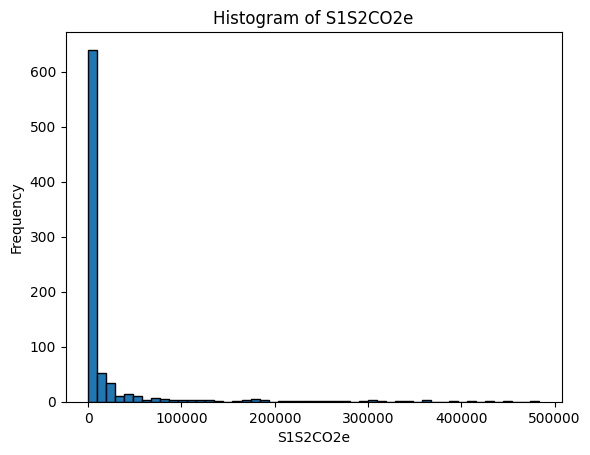

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming scores_table is a pandas DataFrame and "S1S2CO2e" is a column in that DataFrame
plt.hist(scores_500000["S1S2CO2e"], bins=50, edgecolor='black')
plt.title('Histogram of S1S2CO2e')
plt.xlabel('S1S2CO2e')
plt.ylabel('Frequency')
plt.show()

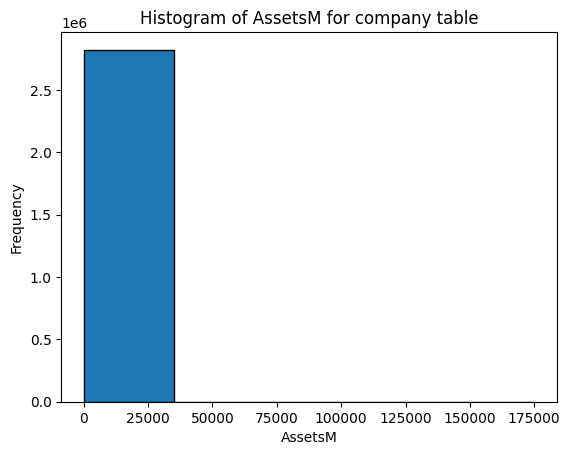

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming scores_table is a pandas DataFrame and "S1S2CO2e" is a column in that DataFrame
plt.hist(companies_table["AssetsM"], bins=5, edgecolor='black')
plt.title('Histogram of AssetsM for company table')
plt.xlabel('AssetsM')
plt.ylabel('Frequency')
plt.show()

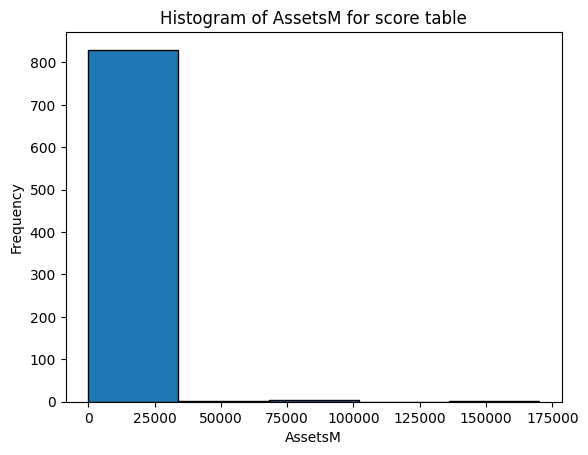

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming scores_table is a pandas DataFrame and "S1S2CO2e" is a column in that DataFrame
plt.hist(scores_500000co_ass["NetAssetsM"], bins=5, edgecolor='black')
plt.title('Histogram of AssetsM for score table')
plt.xlabel('AssetsM')
plt.ylabel('Frequency')
plt.show()

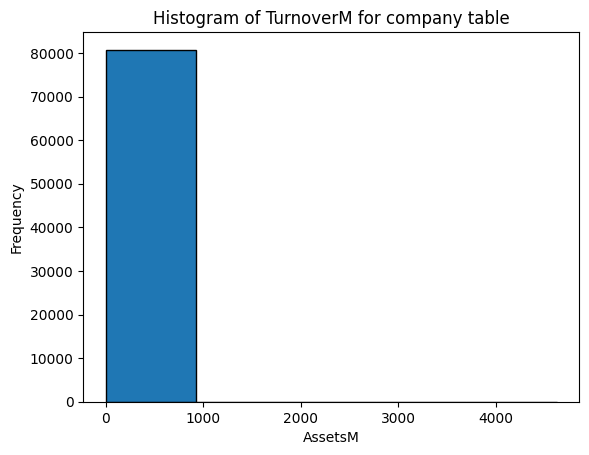

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming scores_table is a pandas DataFrame and "S1S2CO2e" is a column in that DataFrame
plt.hist(companies_table["TurnoverM"], bins=5, edgecolor='black')
plt.title('Histogram of TurnoverM for company table')
plt.xlabel('AssetsM')
plt.ylabel('Frequency')
plt.show()

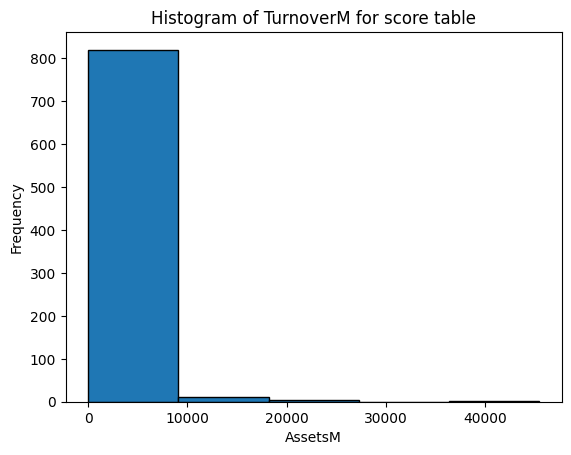

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming scores_table is a pandas DataFrame and "S1S2CO2e" is a column in that DataFrame
plt.hist(scores_500000co_ass["TurnoverM"], bins=5, edgecolor='black')
plt.title('Histogram of TurnoverM for score table')
plt.xlabel('AssetsM')
plt.ylabel('Frequency')
plt.show()

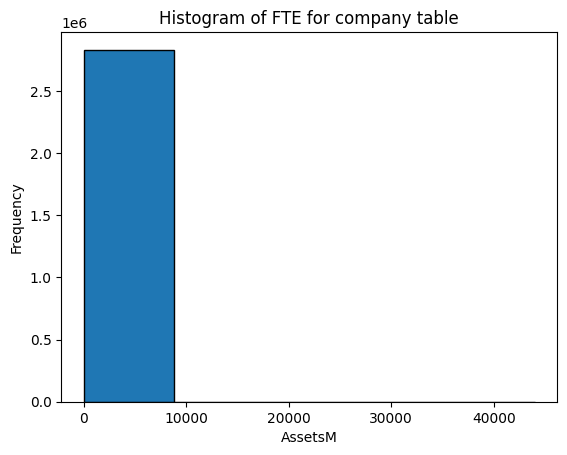

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming scores_table is a pandas DataFrame and "FTE" is a column in that DataFrame
plt.hist(companies_table["FTE"], bins=5, edgecolor='black')
plt.title('Histogram of FTE for company table')
plt.xlabel('AssetsM')
plt.ylabel('Frequency')
plt.show()

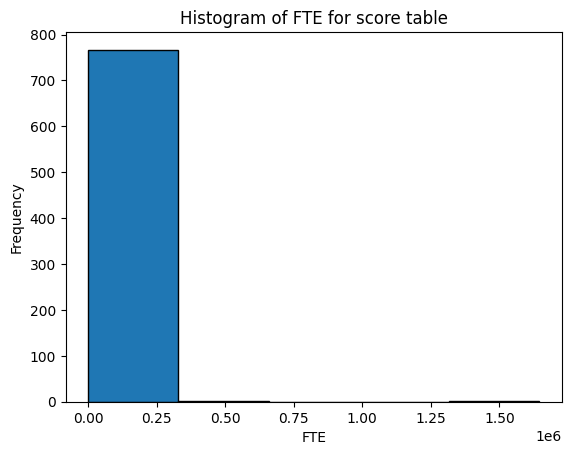

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming scores_table is a pandas DataFrame and "S1S2CO2e" is a column in that DataFrame
plt.hist(scores_500000co_ass["FTE"], bins=5, edgecolor='black')
plt.title('Histogram of FTE for score table')
plt.xlabel('FTE')
plt.ylabel('Frequency')
plt.show()

In [147]:
scores_500000co_ass["FTE"].describe()

count    7.690000e+02
mean     7.194896e+03
std      6.372542e+04
min      0.000000e+00
25%      1.400000e+02
50%      4.620000e+02
75%      1.817000e+03
max      1.645000e+06
Name: FTE, dtype: float64